```Ecole Centrale Nantes
Option InfoIA
PAPY: Programmation avancée python
CM4
Année 2022-2023
Auteur: Lucas Lestandi
lucas.lestandi@ec-nantes.fr
V1.0
```

# Chapitre 4: Du script au module

> *Fini de jouer, on passe au sérieux!*

Pour pouvoir déployer/partager nos codes, il faut aller au delà l'approche scripting. 
- tester et debugger
- optimisation (algorithmique, interprétation, JIT, binding)
- distribution and portabilité des paquets

##  Tester et débugger son code

### Pourquoi tester son code

- pas de vérification explicite des types avant l'exécution en python
    - le typage statique ne suffit pas
- tout le soin du monde dans la conception ne suffit pas
- coder c'est 10% de programmation et 90% de débug
- **Bonus:** valorisation instantanée

> **Objectif** : avoir en main les outils pour s'assurer du bon fonctionnement de programmes de petite taille.
=> On va se focaliser sur le unittesting

Pourquoi?
- tout gros programme est fait de petit blocs que l'on peut tester individuellement.

Pour aller plus loin (en général): 
- tests d'intégration, 
- test driven development, 
- cross-testing, 
- test de non-régression
- ...

Et pour python en particulier:
- `logging
`

### Tester son code

#### A la main

A minima, on va s'assurer à la main que notre code fait ce que l'on souhaite lors du développement.

Dans l'esprit du test-driven development, on va:
- écrire le "prototype de la fonction" avec ses arguments et son docstring (basique)
- mettre en place un (ou des) cas simple dont on connait le résultat à l'avance et en vérifier le résultat.

> A ce stade, on doit pouvoir lancer le script et tous les tests échouent.
- On peut maintenant écrire le contenu de la fonction. 
> Si le code est correct, elle fonctionne

- On passe à la question suivante mais on garde les tests en les plaçant dans une fonction `test_*` qui sera utile  à `pytest`.

##### Et en pratique?

On va user et abuser de `assert`

Si vous souhaitez en savoir plus sur assert:https://realpython.com/python-assert-statement/

In [10]:
def inc(x):
    return x + 1

def test_answer():
    assert inc(3) == 5

In [11]:
test_answer()

AssertionError: 

In [ ]:
def test_answer():
    assert inc(3) == 4
test_answer()  # plus de message d'erreur

Pour un fichier python séparer, on placera le test dans le main:

```python
def inc(x):
    return x + 1

def test_answer():
    assert inc(3) == 5
    
if __name__=="__main__":
    test_answer()
    print("passed answer")
```

### Automatiser avec unittesting, pytest, etc.

On le voit bien, cette version complétement manuelle n'est pas envisageable pour un projet, même de taille raisonable.

#### `pytest` 
est un module python mais aussi un programme qui répond à ce problème. Si on l'exécute à la racine d'un projet, il va effectuer tous les tests et publier un rapport. 

Par exemple, si on a un fichier `test_sample.py` qui contient le code python suivant
```python
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5
```
Lorsque l'on exécute pytest: 
```bash
$ pytest
=========================== test session starts ============================
platform linux -- Python 3.x.y, pytest-7.x.y, pluggy-1.x.y
rootdir: /home/sweet/project
collected 1 item

test_sample.py F                                                     [100%]

================================= FAILURES =================================
_______________________________ test_answer ________________________________

    def test_answer():
>       assert inc(3) == 5
E       assert 4 == 5
E        +  where 4 = inc(3)

test_sample.py:6: AssertionError
========================= short test summary info ==========================
FAILED test_sample.py::test_answer - assert 4 == 5
============================ 1 failed in 0.12s =============================
```
Plus besoin d'un main, qui en plus échouerai à la première erreur.

#### `unittest`
Livré avec python, permet lui aussi d'automatiser les tests. Il repose sur un classe de test avec des méthodes qui constitue les tests. C'est le testeur originel ! 

In [ ]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)
# pour les fichiers
#if __name__ == '__main__': 
#    unittest.main()

In [ ]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


#### `doctest`
Puisqu'il faut écrire un docstring, et que c'est mieux avec des exemples, on va faire d'une pierre deux coups et tester tout en donnant un exemple à l'utilisateur.

In [ ]:
inc('a')

TypeError: can only concatenate str (not "int") to str

In [ ]:
def inc(x):
    """
    Incrémente de 1.
    
    >>> inc(3)
    4
    >>> inc("a")                           
    Traceback (most recent call last):
    ...
    TypeError: can only concatenate str (not "int") to str
    """
    return x + 1

In [ ]:
import doctest
print(doctest.testmod(verbose=1))

Trying:
    inc(3)
Expecting:
    4
ok
Trying:
    inc("a")                           
Expecting:
    Traceback (most recent call last):
    ...
    TypeError: can only concatenate str (not "int") to str
ok
11 items had no tests:
    __main__
    __main__.TestStringMethods
    __main__.TestStringMethods.test_isupper
    __main__.TestStringMethods.test_split
    __main__.TestStringMethods.test_upper
    __main__._38
    __main__._getshapeof
    __main__._getsizeof
    __main__.test_answer
    __main__.update
    __main__.var_dic_list
1 items passed all tests:
   2 tests in __main__.inc
2 tests in 12 items.
2 passed and 0 failed.
Test passed.
TestResults(failed=0, attempted=2)


**En conclusion**
Il existe tout un bestiaire d'outil pour tester son code python de manière plus ou moins automatique. 

Pour aller plus loin
- https://wiki.python.org/moin/PythonTestingToolsTaxonomy
- https://realpython.com/pytest-python-testing/
- https://docs.pytest.org/en/7.1.x/
- https://docs.python-guide.org/writing/tests/


### Débugger en python

Malgré les tests, il y aura des bugs. En python, losrque le programme rencontre une erreur, il nous gratifie d'un traceback détaillé.
```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
/tmp/ipykernel_592/1322912493.py in <module>
----> 1 inc('a')

/tmp/ipykernel_592/373043617.py in inc(x)
      6     4
      7     """
----> 8     return x + 1

TypeError: can only concatenate str (not "int") to str
```

- C'est souvent suffisant pour résoudre le problème. On pourra même ajouter quelques prints bien choisi pour y voir plus clair.

- Parfois, le message d'erreur n'est pas assez clair (*****Error mal défini...) et on voudra un débuggueur plus classique.
  - [`pdb`](https://docs.python.org/fr/3/library/pdb.html) est le débuggueur natif de python
  - [Vscode propose une interface](https://code.visualstudio.com/docs/python/debugging)

####  Débuggage post mortem

On peut appeler directement le débugueur après l'arrêt inopiné d'un programme dans ipython avec `%debug`

In [ ]:
char="a"
inc(char)

TypeError: can only concatenate str (not "int") to str

In [ ]:
%debug

> /tmp/ipykernel_592/837358270.py(12)inc()
      8     Traceback (most recent call last):
      9     ...
     10     TypeError: can only concatenate str (not "int") to str
     11     """
---> 12     return x + 1

ipdb> char
'a'
ipdb> q


Bien sur, on pourra aussi 
- utiliser directement le débuggueur:
```
python -m pdb script.py
```
- placer des points d'arret (en particulier via VScode)
- lire la doc

Brian Kernighan :
> *«  Tout le monde sait que le débogage est deux fois plus difficile que l'écriture d'un programme. Donc, si vous êtes aussi intelligent que vous pouvez l'être quand vous écrivez votre code, comment allez-vous déboguer ?  »*

## Optimisation

<div class="alert alert-danger" role="alert">
   <b> Attention : </b> "L'optimisation prémature est la racine de tous les pêchers."
</div>

### Fil rouge: le jeu de la vie

<div class="alert alert-success" role="alert">
    <b>Le jeu de la vie</b> <br>
Il s’agit d’un automate cellulaire, un modèle où chaque état conduit mécaniquement à l’état suivant à partir de règles préétablies.

Le jeu se déroule sur une grille à deux dimensions, théoriquement infinie, dont les cases appelées « cellules » par analogie avec les cellules vivantes peuvent prendre deux états distincts : « vivante » ou « morte ».

Une cellule possède huit voisins, qui sont les cellules adjacentes horizontalement, verticalement et diagonalement.

À chaque itération, l'état d’une cellule est entièrement déterminé par l’état de ses huit cellules voisines, selon les règles suivantes :
<ul>
<li>une cellule morte possédant exactement trois cellules voisines vivantes devient vivante (elle naît)&nbsp;;</li>
<li>une cellule vivante possédant deux ou trois cellules voisines vivantes le reste, sinon elle meurt.</li>
</ul>
</div>


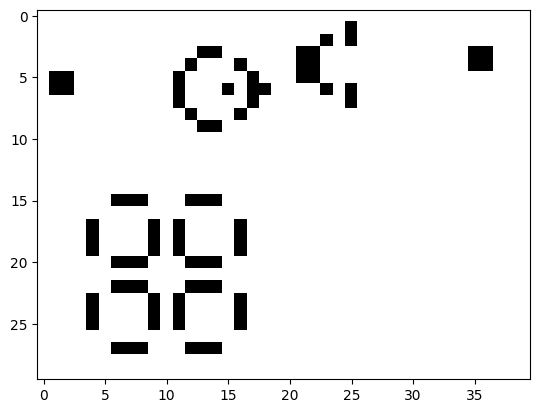

In [15]:
### INITIALISATION DU JEU ###
import numpy as np
import matplotlib.pyplot as plt
init="""........................................
.........................#..............
.......................#.#..............
.............##......##............##...
............#...#....##............##...
.##........#.....#...##.................
.##........#...#.##....#.#..............
...........#.....#.......#..............
............#...#.......................
.............##.........................
........................................
........................................
........................................
........................................
........................................
......###...###.........................
........................................
....#....#.#....#.......................
....#....#.#....#.......................
....#....#.#....#.......................
......###...###.........................
........................................
......###...###.........................
....#....#.#....#.......................
....#....#.#....#.......................
....#....#.#....#.......................
........................................
......###...###.........................
........................................
........................................"""
grid = np.array(
    list(        
        [x == "#" for x in line]
        for line in init.split()
    ),
    dtype=np.int8,
)
plt.imshow(grid, cmap="gray_r")

#### Implémentation naive avec des boucles (sur des array numpy, tout de même)

In [17]:
def update(grid: np.ndarray) -> np.ndarray:
    n, m = grid.shape
    next_grid = np.zeros((n, m), dtype=np.int8)
    # on parcours les lignes et le colones 
    for row in range(n):
        for col in range(m):
            #   somme sur les voisins            
            live_neighbors = (
                np.sum(grid[row - 1 : row + 2, col - 1 : col + 2]) - grid[row, col] # parcours des 8 voisins
            )
            if live_neighbors < 2 or live_neighbors > 3:
                next_grid[row, col] = 0
            elif live_neighbors == 3 and grid[row, col] == 0:
                next_grid[row, col] = 1
            else:
                next_grid[row, col] = grid[row, col]

    return next_grid

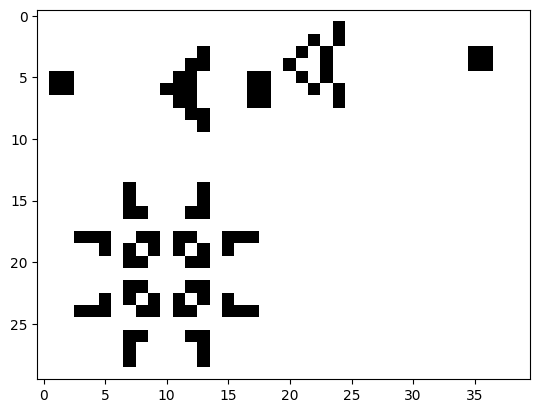

In [18]:
plt.imshow(update(grid), cmap="gray_r")

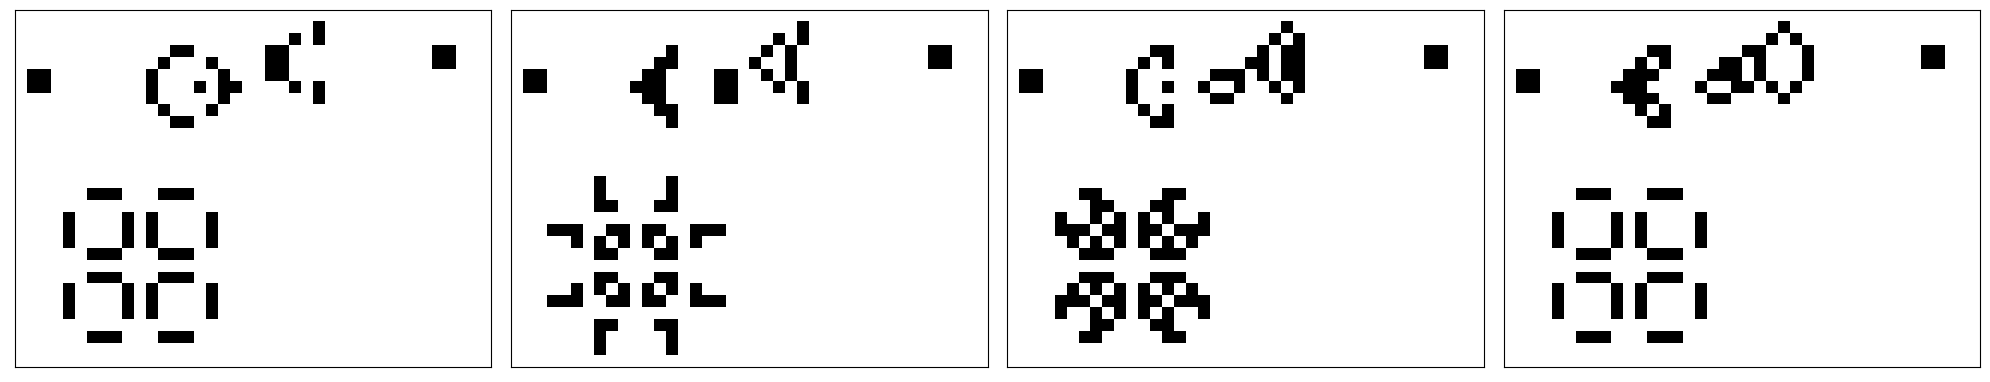

In [19]:
from matplotlib import ticker

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(grid, cmap="gray_r")
ax[1].imshow(update(grid), cmap="gray_r")
ax[2].imshow(update(update(grid)), cmap="gray_r")
ax[3].imshow(update(update(update(grid))), cmap="gray_r")
for ax_ in ax:
    ax_.xaxis.set_major_locator(ticker.NullLocator())
    ax_.yaxis.set_major_locator(ticker.NullLocator())

fig.set_tight_layout(True)

### Instrumenter et analyser son code

Pour optimiser son code, on doit d'abord évaluer quelle partie consomme du temps (ou de la mémoire) pour concentrer ses efforts la ou ils seront efficaces. On aura donc besoin d'outils pour:
- évaluer le temps de calcul / la complexité d'une fonction/méthode
- évaluer le temps de calcul d'une ligne en particulier
- évaluer l'usage mémoire d'une fonction/méthode
- évaluer l'usage mémoire de calcul d'une ligne en particulier

#### Evaluation du temps de calcul

##### `time` 

> `time` est un module de la librairie standard pour mesurer le temps.

C'est l'outil le plus basique mais on peut s'en servir pour construire des chronometres avancés.

Pour plus de détail:  https://realpython.com/python-timer/

In [20]:
### Exemple basique
from time import time 
start=time()
count=0
update(grid)
print(f"Temps de calcul : {time()-start:0.4f} seconds")

Temps de calcul : 0.0041 seconds


##### les magics ipython `%time`  et `%timeit`

In [21]:
%time update(grid)

CPU times: user 4.1 ms, sys: 25 µs, total: 4.13 ms
Wall time: 4.18 ms


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [22]:
%timeit update(grid)

3.93 ms ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Profilage du temps de calcul

Pour une maitrise plus fine du temps de calcul, on utilise des outils spécialisés appelés **profileurs**. Ils renvoient un compte rendu détaillé du temps de calcul de chaque ligne/appel de fonction.

Quelques options:
- The python profiler [`cProfile` et `profile`](https://docs.python.org/3/library/profile.html) : le profileur de la librairie standard.
- [line_profiler](https://github.com/pyutils/line_profiler) pour plus de détails ligne par ligne
```
$ pip install line_profiler
```
- [snakeviz](https://jiffyclub.github.io/snakeviz/) pour des visu dynamiques (surtout dans les notebooks)
```
$ pip install snakeviz
```

#### `profiler` avec %prun

In [23]:
# appel facilité de profile
%prun update(grid)

         10805 function calls in 0.006 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1200    0.002    0.000    0.002    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.001    0.001    0.006    0.006 3468385382.py:1(update)
     1200    0.001    0.000    0.003    0.000 fromnumeric.py:69(_wrapreduction)
     1200    0.001    0.000    0.004    0.000 fromnumeric.py:2162(sum)
     1200    0.000    0.000    0.005    0.000 <__array_function__ internals>:177(sum)
     1200    0.000    0.000    0.000    0.000 fromnumeric.py:70(<dictcomp>)
     1200    0.000    0.000    0.004    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     1200    0.000    0.000    0.000    0.000 fromnumeric.py:2157(_sum_dispatcher)
     1200    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
     1200    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        1   

#### `line_profiler` avec %lprun
<div class="alert alert-danger" role="alert">
   <b> Attention : </b> par construction ne fonctionne qu'avec les fonctions.
</div>

In [24]:
%load_ext line_profiler

In [25]:
%lprun -f update update(grid)

Timer unit: 1e-06 s

Total time: 0.011297 s
File: /var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_7931/3468385382.py
Function: update at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def update(grid: np.ndarray) -> np.ndarray:
     2         1          4.0      4.0      0.0      n, m = grid.shape
     3         1         15.0     15.0      0.1      next_grid = np.zeros((n, m), dtype=np.int8)
     4                                               # on parcours les lignes et le colones 
     5        31         12.0      0.4      0.1      for row in range(n):
     6      1230        427.0      0.3      3.8          for col in range(m):
     7                                                       #   somme sur les voisins            
     8      1200        427.0      0.4      3.8              live_neighbors = (
     9      1200       8953.0      7.5     79.3                  np.sum(grid[row - 1 : row + 2, 

#### `snakeviz` avec %snakeviz

In [26]:
%load_ext snakeviz

In [27]:
%snakeviz update(grid)

 
*** Profile stats marshalled to file '/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/tmpf2_3zd5b'.
Embedding SnakeViz in this document...


 #### Profilage mémoire

Le profilage mémoire fonctionne de manière similaire. Ici on va découvrir le module [`memory-profiler`](https://github.com/pythonprofilers/memory_profiler/blob/master/README.rst)
```bash
$pip install memory-profiler
```

In [29]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [30]:
%memit update(grid)

peak memory: 136.72 MiB, increment: 0.53 MiB


De même, on peut profiler la mémoire par ligne avec la version "mémoire" de `%lprun`.

In [33]:
%mprun -f update update(grid)

ERROR: Could not find file /var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_7931/3468385382.py



<div class="alert alert-success" role="alert">
   <b> Remarque : </b> ces appels dans le notebook sont très pratique. Pour une approche plus générale et avec les possibilités de personalisation qui vont avec, se référer à la doc de chacun des programmes.
</div>

<div class="alert alert-success" role="alert">
   <b> Remarque 2: </b> il existe tout un tas d'autres librairies, en particulier des solutions multilangages (valgrind, etc.) et propriétaires.
</div>

###  Réduction de la complexité algorithmique

> Le moyen le plus direct (mais rarement le plus simple) d'accélérer un calcul est d'en réduire la complexité! 

cf. ALGOA

<table>
<caption>Tableau comparatif des tris procédant par comparaisons</caption>
<thead><tr>
<th class="headerSort" tabindex="0" role="columnheader button" title="Tri croissant">Nom</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Tri croissant">Cas optimal</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Tri croissant">Cas moyen</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Tri croissant">Pire des cas</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Tri croissant">Complexité spatiale</th>
<th class="headerSort" tabindex="0" role="columnheader button" title="Tri croissant">Stable
</th></tr></thead><tbody>
<tr align="center">
<td><a href="/wiki/Tri_rapide" title="Tri rapide">Tri rapide</a>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#ffd"><span data-sort-value="05"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/317ab5292da7c7935aec01a570461fe0613b21d5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:4.754ex; height:2.509ex;" alt="\log n"></span> en moyenne, <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span> dans le pire des cas ;<br> variante de Sedgewick&nbsp;: <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/317ab5292da7c7935aec01a570461fe0613b21d5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:4.754ex; height:2.509ex;" alt="\log n"></span> dans le pire des cas</span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_fusion" title="Tri fusion">Tri fusion</a>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_par_tas" title="Tri par tas">Tri par tas</a>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_par_insertion" title="Tri par insertion">Tri par insertion</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Introsort" title="Introsort">Introsort</a>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#ffd"><span data-sort-value="05"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/317ab5292da7c7935aec01a570461fe0613b21d5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:4.754ex; height:2.509ex;" alt="\log n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_par_s%C3%A9lection" title="Tri par sélection">Tri par sélection</a>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Timsort" title="Timsort">Timsort</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_de_Shell" title="Tri de Shell">Tri de Shell</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#ffd"><span data-sort-value="23"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log ^{2}n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <msup>
          <mi>log</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log ^{2}n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8dcc3d3ab4d647731efd75119a13e8febd1a7e44" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:7.59ex; height:3.009ex;" alt="n \log^2 n"></span><br>ou<br><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{3/2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>3</mn>
            <mrow class="MJX-TeXAtom-ORD">
              <mo>/</mo>
            </mrow>
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{3/2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7101d69221defce7e4590ac55cfb4f22ea1732b2" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:4.093ex; height:2.843ex;" alt="n^{3/2}"></span></span>
</td>
<td style="background:#ffd"><span data-sort-value="23"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log ^{2}n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <msup>
          <mi>log</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log ^{2}n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8dcc3d3ab4d647731efd75119a13e8febd1a7e44" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:7.59ex; height:3.009ex;" alt="n \log^2 n"></span> pour la meilleure<br> suite d'espacements connue</span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_%C3%A0_bulles" title="Tri à bulles">Tri à bulles</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_arborescent" title="Tri arborescent">Tri arborescent</a>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span> (arbre équilibré)</span>
</td>
<td style="background:#fdd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Smoothsort" title="Smoothsort">Smoothsort</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="20"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_cocktail" title="Tri cocktail">Tri cocktail</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_%C3%A0_peigne" title="Tri à peigne">Tri à peigne</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n\log n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
        <mi>log</mi>
        <mo>⁡<!-- ⁡ --></mo>
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n\log n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/560dfdce0353a330e03e4b3e0b7ca6e484bb40fb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:6.535ex; height:2.509ex;" alt="n\log n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="1">Non</span>
</td></tr>
<tr align="center">
<td><a href="/wiki/Tri_pair-impair" title="Tri pair-impair">Tri pair-impair</a>
</td>
<td style="background:#dfd"><span data-sort-value="15"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mi>n</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a601995d55609f2d9f5e233e36fbe9ea26011b3b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.395ex; height:1.676ex;" alt="n"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#fdd"><span data-sort-value="25"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle n^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <msup>
          <mi>n</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle n^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ac9810bbdafe4a6a8061338db0f74e25b7952620" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.449ex; height:2.676ex;" alt="n^{2}"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="00"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle scriptlevel="0" displaystyle="true">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"></span></span>
</td>
<td style="background:#dfd"><span data-sort-value="0">Oui</span>
</td></tr></tbody><tfoot></tfoot>
</table>

Source : [*wikipedia*](https://fr.wikipedia.org/wiki/Algorithme_de_tri)

### Dépasser les limites de l'interpréteur

#### User et abuser des bibliothèques reposant sur des implémentations compilées

In [34]:
def update_np(grid):
    next_grid = np.zeros_like(grid, dtype=np.int8)
    # on crée un tableau numpy avec la somme des voisins pour chaque case
    N = (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
         grid[1:-1, 0:-2]                    +grid[1:-1, 2:] +
         grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])
    # des masques pour les naissances et survies
    birth = (N == 3) & (grid[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (grid[1:-1, 1:-1] == 1)
    next_grid[1:-1, 1:-1][birth | survive] = 1
    return next_grid

In [35]:
%timeit update_np(grid)

34.7 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [36]:
print(f"réduction du temps de calcul d'un facteur: {3.58/0.0216:0.0f} entre la version naive et la version pythonique")

réduction du temps de calcul d'un facteur: 166 entre la version naive et la version pythonique


### Just In Time (JIT) avec numba

In [37]:
import numba


@numba.jit(nopython=True)
def update_numba(grid: np.ndarray) -> np.ndarray:
    n, m = grid.shape
    next_grid = np.zeros((n, m), dtype=np.int8)

    for row in range(n):
        for col in range(m):
            live_neighbors = (
                np.sum(grid[row - 1 : row + 2, col - 1 : col + 2]) - grid[row, col]
            )
            if live_neighbors < 2 or live_neighbors > 3:
                next_grid[row][col] = 0
            elif live_neighbors == 3 and grid[row][col] == 0:
                next_grid[row][col] = 1
            else:
                next_grid[row][col] = grid[row][col]

    return next_grid

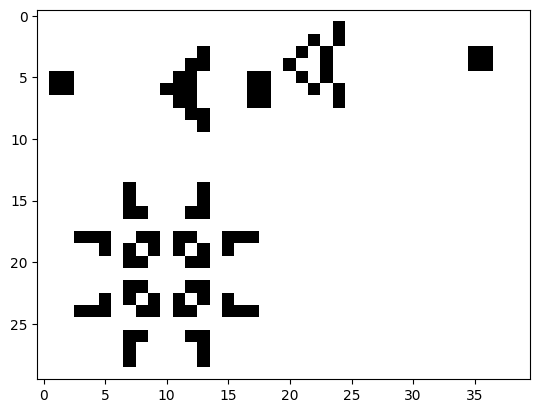

In [38]:
plt.imshow(update_numba(grid), cmap="gray_r")

In [39]:
%timeit update_numba(grid)

23.6 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


 - Numba est très efficace pour accélerer le temps dexécution des fonctions python. Il se limité néanmoins aux fonctions et il est assez difficile à optimiser.

 - Plus difficile à prendre en main, `cython` offre plus de controle grace à une surcouche du langage python

In [43]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [44]:
%%cython -a
import numpy as np
from cython import boundscheck, wraparound

@boundscheck(False)
@wraparound(False)
def update_cython3(signed char[:, :] grid):
    cdef int n, m, row, col, live_neighbors
    cdef signed char[:, :] next_grid
    
    n = grid.shape[0]
    m = grid.shape[1]
    next_grid = np.zeros((n, m), dtype=np.int8)

    for row in range(n):
        for col in range(m):
            live_neighbors =  (
                grid[row-1, col-1] + grid[row-1, col] + grid[row-1, col+1] +
                grid[row, col-1] +                      grid[row, col+1] +
                grid[row+1, col-1] + grid[row+1, col] + grid[row+1, col+1]
            )
                        
            if live_neighbors < 2 or live_neighbors > 3:
                next_grid[row][col] = 0
            elif live_neighbors == 3 and grid[row][col] == 0:
                next_grid[row][col] = 1
            else:
                next_grid[row][col] = grid[row][col]
    
    return next_grid

/Users/dgalembeck/.cache/ipython/cython/_cython_magic_ca0ca05ee3f0dd7cbb9721402aa23a6d.c:18930:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
                    CYTHON_FALLTHROUGH;
                    ^
/Users/dgalembeck/.cache/ipython/cython/_cython_magic_ca0ca05ee3f0dd7cbb9721402aa23a6d.c:357:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
      #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
                                 ^
/Users/dgalembeck/.cache/ipython/cython/_cython_magic_ca0ca05ee3f0dd7cbb9721402aa23a6d.c:18941:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
                    CYTHON_FALLTHROUGH;
                    ^
/Users/dgalembeck/.cache/ipython/cython/_cython_magic_ca0ca05ee3f0dd7cbb9721402aa23a6d.c:357:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
      #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
                                 ^
2 warnings generated.
ld: 

In [45]:
%timeit update_cython3(grid)

3.06 µs ± 12 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [48]:
import numba

@numba.jit(nopython=True)
def update_numba(grid: np.ndarray) -> np.ndarray:
    next_grid = np.zeros(grid.shape, dtype=np.int8)
    n, m = grid.shape
    
    for row in range(n):
        for col in range(m):
            live_neighbors =  (
                grid[row-1, col-1] + grid[row-1, col] + grid[row-1, col+1] +
                grid[row, col-1] +                      grid[row, col+1] +
                grid[row+1, col-1] + grid[row+1, col] + grid[row+1, col+1]
            )
            
            # If the number of surrounding live cells is < 2 or > 3 then we make the cell at grid[row][col] a dead cell
            if live_neighbors < 2 or live_neighbors > 3:
                next_grid[row][col] = 0
            # If the number of surrounding live cells is 3 and the cell at grid[row][col] was previously dead then make
            # the cell into a live cell
            elif live_neighbors == 3 and grid[row][col] == 0:
                next_grid[row][col] = 1
            # If the number of surrounding live cells is 3 and the cell at grid[row][col] is alive keep it alive
            else:
                next_grid[row][col] = grid[row][col]
    
    return next_grid

In [49]:
%timeit update_numba(grid)

6.21 µs ± 2.99 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Parallélisme  et concurrence en python

<div class="alert alert-danger" role="alert">
   <b> Attention : </b> concurrence $\neq$ parallèlisme. <br>
   La <b>concurrence</b> c'est l'exécutions de plusieurs taches (plus ou moins) en même temps. Penser <i> thread</i> avec mémoire généralement partagée et chemins d'exécution variable.<br>
   Le <b> parallèlisme </b>, c'est l'usage de plusieurs coeurs (ou machines) en même temps pour diviser le temps de calcul. La mémoire peut etre partager ou non. Ex: MPI ou openMP. <br>
</div>

#### Appels concurrents
<div class="alert alert-success" role="alert">
   <b>Global Interpreter Lock (GIL)</b>  est un mécanisme intégré à l'interpréteur le plus courant (CPython) qui garanti qu'un seul processus à la fois peut accéder à certaines resssources pour en assurer le bon fonctionnement. <br>
    $\Longrightarrow$ bloque l'exécution parallèle de threads python... Deux conséquences : 
    <ol>
        <li>Les calculs couteux ne sont pas plus rapides</li>
        <li>Les IOs ou appels systems ne sont pas impactés</li>
    </ol>
</div>

##### Bon usage du multithreading
On va télécharger tout un tas de drapeaux avec et sans le module `threading.Thread`.

In [53]:
import requests
r = requests.get("https://flagcdn.com/fr/codes.json")
codes = r.json()

In [54]:
%%time
for c in codes.keys():
    url = f"https://flagcdn.com/256x192/{c}.png"
    r = requests.get(url)

CPU times: user 6.49 s, sys: 454 ms, total: 6.94 s
Wall time: 32.9 s


In [55]:
from ipywidgets import Image
Image(value=r.content)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\xc0\x08\x03\x00\x00\x00\xdc3MT\x…

In [56]:
from threading import Thread
class Drapeau(Thread):
    def __init__(self, code):
        super().__init__()
        self.code = code

    def run(self):
        url = f"https://flagcdn.com/256x192/{self.code}.png"
        self.r = requests.get(url)

In [57]:
%%time
threads = []
for c in codes.keys():
    thread = Drapeau(c)
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()

CPU times: user 4.54 s, sys: 1.79 s, total: 6.33 s
Wall time: 3.11 s


In [58]:
from ipywidgets import Image
Image(value=thread.r.content)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\xc0\x08\x03\x00\x00\x00\xdc3MT\x…

##### Mauvais usage du multithreading

In [59]:
class LocalUpdate(Thread):
    def __init__ (self,grid,row,col):
        super().__init__()
        self.grid=grid
        self.row=row
        self.col=col
        self.val=0
        
    def run(self):
        live_neighbors = np.sum(self.grid[self.row -1 : self.row + 2, self.col - 1 : self.col + 2]) - self.grid[self.row, self.col] 
        if live_neighbors < 2 or live_neighbors > 3:
            self.val= 0
        elif live_neighbors == 3 and self.grid[self.row, self.col] == 0:
            self.val= 1
        else:
            self.val=self.grid[self.row, self.col]

def update_threaded(grid: np.ndarray) -> np.ndarray:
    n, m = grid.shape
    next_grid = np.zeros((n, m), dtype=np.int8)
    # on parcours les lignes et le colones 
    threads=[[None for _ in range(m)]for _ in range(n)]
    for row in range(n):
        for col in range(m):
            thread=LocalUpdate(grid,row,col)
            thread.start()
            threads[row][col]=thread
    # On récupère les résultats
    for row in range(n):
        for col in range(m):
            next_grid[row,col]=threads[row][col].val
    return next_grid

CPU times: user 48.7 ms, sys: 44.4 ms, total: 93.2 ms
Wall time: 96.6 ms
Speedup comparé à l'original python pur 0.03 soit une multiplication par 31 du temps de calcul


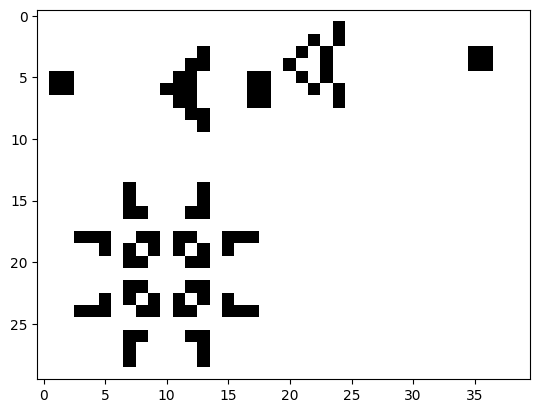

In [60]:
%time update_threaded(grid)
print(f"Speedup comparé à l'original python pur {3.58/110:0.2f} soit une multiplication par {110/3.58:0.0f} du temps de calcul")
plt.imshow(update_threaded(grid), cmap="gray_r")


Entrer dans le détail du multithreading dépasse le contenu de ce cours. Pour aller plus loin
- [`asyncio`](https://docs.python.org/fr/3/library/asyncio.html) (quelques incompatibilités avec jupyter)
- https://realpython.com/python-concurrency/

#### Parallèlisme
La programmation parallèle est l'arme ultime pour les calcul de grande envergure mais elle ne s'applique pas du tout à un problème de taille aussi modeste. On distingue deux grandes familles:
- mémoire partagée, avec **OpenMP**
    1. fonctionne facilement sur machine personelle.
    1. numpy (entre autre) utilise déjà ce parallèlisme pour les opération d'algèbre linaire
- mémoire distribuée, avec **MPI**
    1. sur supercalculateur
    1. l'utilisateur dois gérer les communications entre les noeuds
    
 ![](openMP_MPI.png)

### Déporter des calculs sur GPU avec `cupy`

In [61]:
%%html 
<iframe src="https://cupy.dev/" width="1200" height="800"></iframe>

In [1]:
import cupy as cp
def update_cp(grid):
    next_grid = cp.zeros_like(grid, dtype=np.int8)
    # on crée un tableau numpy avec la somme des voisins pour chaque case
    N = (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
         grid[1:-1, 0:-2]                    +grid[1:-1, 2:] +
         grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])
    # des masques pour les naissances et survies
    birth = (N == 3) & (grid[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (grid[1:-1, 1:-1] == 1)
    next_grid[1:-1, 1:-1][birth | survive] = 1
    return next_grid

ModuleNotFoundError: No module named 'cupy'

In [2]:
grid_GPU=cp.array(grid)

NameError: name 'cp' is not defined

In [ ]:
%time update_cp(grid_GPU)

CPU times: user 3.33 ms, sys: 733 µs, total: 4.07 ms
Wall time: 2.1 ms


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

Ici, ce n'est pas très efficace car le tableau est trop petit. Il faut des problèmes beaucoup plus grand pour tirer partie du GPU.
- Réel avantage à partir de $10^7$ doubles

### Approche multilangages : bindings
Python s'interface très bien avec d'autres langages, en particulier le C++.

**Mais pourquoi est-ce utile?**
- si on a déjà une librairie C/C++ de grande taille, stable, rapide.
- si on souhaite encore accélérer notre implémentation
- si on utilise python comme un outil de test pour d'autres programmes

**Vast sujet qui mérite un cours à lui seul!** Puisqu'il faut gérer:
- les types
- les allocations
- les deux langages (et la compilation du C/C++
- les mutables/immutables
- ...

Quelques outils célèbres: 
 - ctypes
 - PyBind11
 - Cython
 - F2PY
 - Pyjulia
 - gopy
 - ...
 

## Distribution et portabilité des paquets

La semaine prochaine:
- Fin du CM4:
    - préparation du dossier de devloppement
    - installation locale et geestion des dépendances
    - processus de publication
- TP noté